<br>
<font size='6'><b>Introdution to Numpy and Matplotlib</b></font><br><br>

- by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/)
    - Adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial .

- Neil Lawrence
    - 11th February 2014 [Gaussian Process](http://ml.dcs.shef.ac.uk/gpss/gprs14/) Road Show, Pereira, Colombia


<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        Collected by Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

$$\newcommand{\inputScalar}{x}
\newcommand{\inputVector}{\mathbf{x}}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\dataScalar}{y}
\newcommand{\dataVector}{\mathbf{y}}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\lengthScale}{\ell}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{w}}
\newcommand{\mappingFunctionScalar}{f}
\newcommand{\mappingFunctionVector}{\mathbf{f}}
\newcommand{\dataStd}{\sigma}
\newcommand{\numData}{n}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\zerosVector}{\mathbf{0}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\mathbf{\epsilon}}
\newcommand{\noiseMatrix}{\mathbf{\Epsilon}}
\newcommand{\basisMatrix}{\mathbf{\Phi}}
\newcommand{\basisVector}{\mathbf{\phi}}
\newcommand{\basisScalar}{\phi}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\meanVector}{\boldsymbol{\mu}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{\kernelScalar}}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\meanScalar}{\mu}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}$$

Python is a generic programming language with 'numerical' and scientific capabilities added on through the numpy and scipy libraries. There are excellent 2-D plotting facilities available through matplotlib.

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

# 1. Basics Python 



## 1.1. Variable Types

### Numbers

Integers and floats work as you would expect from other languages:

In [1]:
x = 3
print(x)
print(type(x))

3
<class 'int'>


In [2]:
print(x + 1)  # Addition;
print(x - 1)  # Subtraction;
print(x * 2)  # Multiplication;
print(x ** 2) # Exponentiation;

4
2
6
9


In [3]:
x += 1
print(x)  
x *= 2
print(x)  

4
8


In [4]:
print(x/2)

4.0


In [5]:
x = 3.
print(x/2)

1.5


In [6]:
y = 2.5
print(type(y) )
print(y, y + 1, y*2, y**2 )

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (`x++`) or decrement (`x--`) operators.

### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [7]:
t, f = True, False
print(type(t)) # Prints "<type 'bool'>"

<class 'bool'>


In [8]:
print(t and f) # Logical AND
print(t or f)  # Logical OR
print(not t)   # Logical NOT

False
True
False


### Strings

In [9]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello, len(hello))

hello 5


In [10]:
hw = hello + ' ' + world  # String concatenation
print(hw)                  # prints "hello world"

hello world


## 1.2. Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples. We will focus on lists here.

### List
A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [11]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[0], xs[1])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
3 1
2


In [12]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [13]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

[3, 1, 'foo', 'bar']


In [14]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs )

bar [3, 1, 'foo']


### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [15]:
nums = list(range(5))    # range is a built-in function that creates a list of integers

print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"

nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 8, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


### Loops

You can loop over the elements of a list like this:

In [16]:
nums = [3, 4, 1, 5]
for num in nums:
    print(num + 1)

4
5
2
6


In [17]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


### List comprehensions:
When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [18]:
nums = [0, 1, 2, 3, 4]     # lsit
squares = []               # empty list

for x in nums:
    squares.append(x**2)
    
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [19]:
nums = [0, 1, 2, 3, 4]
squares = [x**2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [20]:
nums = [0, 1, 2, 3, 4]
even_squares = [x**2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


### Functions

Python functions are defined using the def keyword. For example:

In [21]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


# 2. Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users.html) useful to get started with Numpy.

The numpy library provides most of the manipulations we need for arrays in python. numpy is short for numerical python, but as well as providing the numerics, numpy provides contiguous array objects. These objects weren't available in the original python. The first step is to import numpy. 

To use Numpy, we first need to import the `numpy` package:

In [22]:
import numpy as np

## 2.1. Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [23]:
a = np.array([1, 2, 3])  # Create a rank 1 array from list
print(type(a), a.shape, a[0], a[1], a[2])

a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [24]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [25]:
print(b.shape)                   
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [26]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[ 0.  0.]
 [ 0.  0.]]


In [27]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[ 1.  1.]]


In [28]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[ 1.  0.]
 [ 0.  1.]]


In [29]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[ 0.67605307  0.41444787]
 [ 0.47217876  0.93112423]]


To get help about any command in the notebook simply type that command followed by a question mark.

In [30]:
np.random.random?

Append more elements in numpy array

In [31]:
y = np.array([7, 5])
y = np.append(y, 4)

print(y)

[7 5 4]


## 2.2. Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [32]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]

b = a[:2, 1:3]

print(b)

[[2 3]
 [6 7]]


__Important__: A slice of an array is a view into the same data, so modifying it will modify the original array. 

In [33]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]

print(b)
print(a)

2
[[77  3]
 [ 6  7]]
[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing.

Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array:

In [34]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [35]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a

print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [36]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [37]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [38]:
# An example of integer array indexing.
b = [a[0, 0], a[1, 1], a[2, 0]]
print(b, type(b))

print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1, 4, 5] <class 'list'>
[1 4 5]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [39]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [40]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


## 2.3. Array math

Basic mathematical functions operate __elementwise__ on arrays, and are available both as operator overloads and as functions in the numpy module:

In [41]:
A = np.array([[1,2],[3,4]], dtype = np.float64)
B = np.array([[5,6],[7,8]], dtype = np.float64)

# Elementwise sum; both produce the array
print(A + B)
print(np.add(A,B))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [42]:
# Elementwise difference; both produce the array
print(A - B)
print(np.subtract(A,B))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [43]:
# Elementwise product; both produce the array
print(A*B)
print(np.multiply(A,B))

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [44]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(A/B)
print(np.divide(A,B))

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [45]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(A))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, $*$ is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [46]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [47]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(A.dot(v))
print(np.dot(A, v))

[29 67]
[29 67]


In [48]:
v2 = np.array([[9,10]])
w2 = np.array([[11, 12]])

print(np.dot(A, v2.T))

[[29]
 [67]]


In [49]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(A.dot(B))
print(np.dot(A, B))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [50]:
M = np.array([[1,2],[3,4]])

print(M)
print(np.sum(M))            # Compute sum of all elements; prints "10"
print(np.sum(M, axis = 0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(M, axis = 1))  # Compute sum of each row; prints "[3 7]"

[[1 2]
 [3 4]]
10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by `numpy` in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [51]:
print(M)
print(M.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [52]:
v = np.array([1,2,3])
print(v) 
print(v.T)

[1 2 3]
[1 2 3]


In [53]:
v2 = np.array([[1,2,3]])
print(v2) 
print(v2.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


In [54]:
v3 = np.reshape(v,(3,1))
print(v3)

[[1]
 [2]
 [3]]


## 2.4. Broadcasting

Broadcasting is a powerful mechanism that allows `numpy` to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [55]:
x = np.array([1,2,3])
y = 3

print(x + y)

[4 5 6]


In [56]:
x = np.array([1,2,3])
x = x - x.mean()

print(x)

[-1.  0.  1.]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [57]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y

x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting. This line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## 2.5. Pass-by-Reference

In [58]:
y = 7
x = y    
x = 8

print(x, y)

8 7


Be careful: pass-by-reference (for list)

In [59]:
y = [7, 5]
x = y

y[0] = 6
print(x, y)

y.append(3)
print(x, y)

[6, 5] [6, 5]
[6, 5, 3] [6, 5, 3]


Be careful: pass-by-reference (for numpy array)

In [60]:
y = np.array([7, 5])
x = y

y[0] = 6
print(x, y)

[6 5] [6 5]


To prevent, use `copy()`

In [61]:
y = np.array([7, 5])
x = y.copy()

y[0] = 6
print(x, y)

[7 5] [6 5]


# 3. Plotting in Python (Matplotlib)

## Plot

[Matplotlib](http://matplotlib.org/gallery.html) is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

Next we need to include the plotting functionality from matplotlib, and instruct IPython notebook to include the plots *inline* with the notebook, rather than in a different window. First we import the plotting library, matplotlib.

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

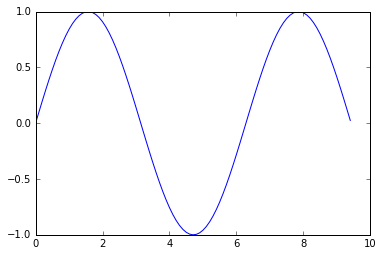

In [63]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0,3*np.pi,0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

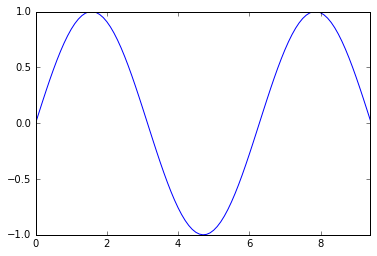

In [64]:
plt.plot(x, y)
plt.axis('tight')
plt.show()

With just a little bit of [extra work](http://matplotlib.org/users/pyplot_tutorial.html) we can easily plot multiple lines at once, and add a title, legend, and axis labels:

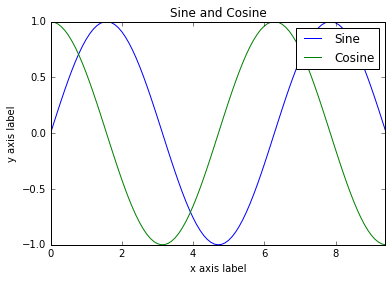

In [65]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)

plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.axis('tight')
plt.show()

## Subplot
You can plot different things in the same figure using the subplot function. You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

Here is an example:

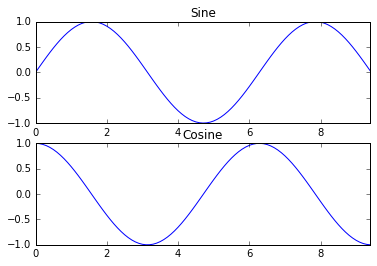

In [66]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.axis('tight')
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.axis('tight')
plt.title('Cosine')

# Show the figure.
plt.show()

In [67]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>